In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import seaborn as sb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Preprocessing

In [4]:
bikes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analyst Portfolio Projects/london_merged.csv")
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
#explore the data
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
bikes.shape

(17414, 10)

In [7]:
# count the unique values in the weather_code column
bikes["weather_code"].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [8]:
# count the unique values in the season column
bikes["season"].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [9]:
# specifying the column names that I want to use
new_cols_dict = {
   'timestamp' : 'time',
    'cnt':'count',
    't1':'temp_real_C',
    't2':'temp_feels_like_C',
    'hum':'humidity_percent',
    'wind_speed':'wind_speed_kph',
    'weather_code':'weather',
    'is_holiday':'is_holiday',
    'is_weekend':'is_weekend',
    'season':'season'

}

# Renaming the columns to the specified column names
bikes.rename(new_cols_dict, axis=1, inplace=True)

In [10]:
# changing the humidity values to percentage (i.e. a value between 0 and 1)
bikes.humidity_percent = bikes.humidity_percent / 100

In [11]:
bikes

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,4.0,0.0,0.0,3.0


In [12]:
# creating a weather dictionary so that we can map the integers to the actual written values
weather_dict = {
    '1.0':'Clear',
    '2.0':'Scattered clouds',
    '3.0':'Broken clouds',
    '4.0':'Cloudy',
    '7.0':'Rain',
    '10.0':'Rain with thunderstorm',
    '26.0':'Snowfall'
}
# changing the weather column data type to string
bikes.weather = bikes.weather.astype('str')
# mapping the values to the actual written weathers
bikes.weather = bikes.weather.map(weather_dict)

In [13]:
bikes

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,0.810,19.0,Broken clouds,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,0.810,21.0,Cloudy,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,0.785,24.0,Cloudy,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,0.760,23.0,Cloudy,0.0,0.0,3.0


In [14]:
# creating a season dictionary so that we can map the integers 0-3 to the actual written values
season_dict = {
    '0.0':'spring',
    '1.0':'summer',
    '2.0':'autumn',
    '3.0':'winter'
}

# changing the seasons column data type to string
bikes.season = bikes.season.astype('str')
# mapping the values 0-3 to the actual written seasons
bikes.season = bikes.season.map(season_dict)

In [15]:
bikes.head()

,time,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,weather,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,0.930,6.0,Broken clouds,0.0,1.0,winter
1,2015-01-04 01:00:00,138,3.0,2.5,0.930,5.0,Clear,0.0,1.0,winter
2,2015-01-04 02:00:00,134,2.5,2.5,0.965,0.0,Clear,0.0,1.0,winter
3,2015-01-04 03:00:00,72,2.0,2.0,1.000,0.0,Clear,0.0,1.0,winter
4,2015-01-04 04:00:00,47,2.0,0.0,0.930,6.5,Clear,0.0,1.0,winter


In [16]:
# writing the final dataframe to an excel file that we will use in our Tableau visualisations.
#The file will be the 'london_bikes_final.xlsx' file and the sheet name is 'Data'

#bikes.to_excel('london_bikes_final.xlsx', sheet_name='Data')

### Exploratory Data Analysis (EDA)

To analyze relationships between variables, trends over time, or seasonal variations.

#### 1- Univariate Analysis

In [17]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               17414 non-null  object 
 1   count              17414 non-null  int64  
 2   temp_real_C        17414 non-null  float64
 3   temp_feels_like_C  17414 non-null  float64
 4   humidity_percent   17414 non-null  float64
 5   wind_speed_kph     17414 non-null  float64
 6   weather            17414 non-null  object 
 7   is_holiday         17414 non-null  float64
 8   is_weekend         17414 non-null  float64
 9   season             17414 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 1.3+ MB


In [18]:
#Calculate the mean, median, and mode of numerical variables
bikes.describe()

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,0.723250,15.913063,0.022051,0.285403
std,1085.108068,5.571818,6.615145,0.143132,7.894570,0.146854,0.451619
min,0.000000,-1.500000,-6.000000,0.205000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,0.630000,10.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,0.745000,15.000000,0.000000,0.000000
75%,1671.750000,16.000000,16.000000,0.830000,20.500000,0.000000,1.000000
max,7860.000000,34.000000,34.000000,1.000000,56.500000,1.000000,1.000000


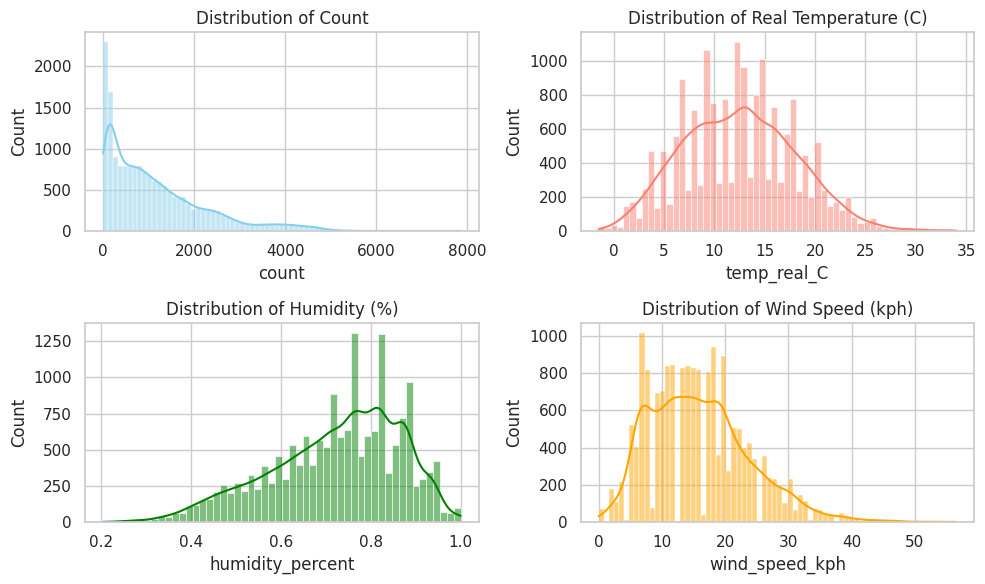

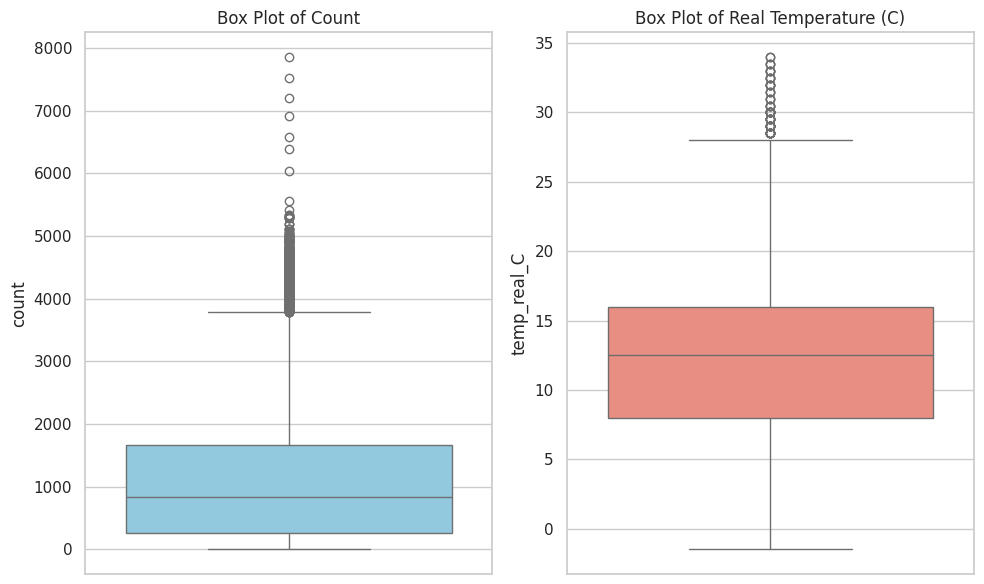

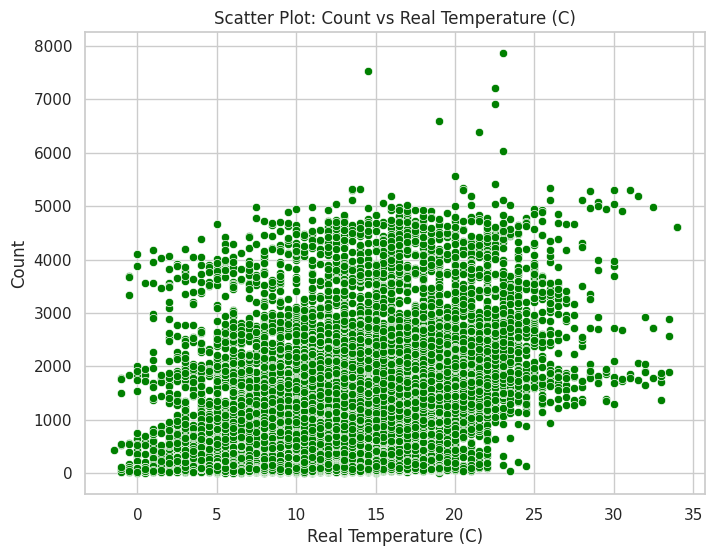

In [19]:
#Visualize Numerical Variables
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Histograms
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.histplot(bikes['count'], kde=True, color='skyblue')
plt.title('Distribution of Count')

plt.subplot(2, 2, 2)
sns.histplot(bikes['temp_real_C'], kde=True, color='salmon')
plt.title('Distribution of Real Temperature (C)')

plt.subplot(2, 2, 3)
sns.histplot(bikes['humidity_percent'], kde=True, color='green')
plt.title('Distribution of Humidity (%)')

plt.subplot(2, 2, 4)
sns.histplot(bikes['wind_speed_kph'], kde=True, color='orange')
plt.title('Distribution of Wind Speed (kph)')

plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=bikes['count'], color='skyblue')
plt.title('Box Plot of Count')

plt.subplot(1, 2, 2)
sns.boxplot(y=bikes['temp_real_C'], color='salmon')
plt.title('Box Plot of Real Temperature (C)')

plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp_real_C', y='count', data=bikes, color='green')
plt.title('Scatter Plot: Count vs Real Temperature (C)')
plt.xlabel('Real Temperature (C)')
plt.ylabel('Count')
plt.show()

In [20]:
#Summarize Categorical Variables

# Calculate frequency counts of categorical variables
weather_counts = bikes['weather'].value_counts()
season_counts = bikes['season'].value_counts()

# Calculate proportions of categorical variables
total_count = len(bikes)  # Total number of observations
weather_proportions = bikes['weather'].value_counts(normalize=True)
season_proportions = bikes['season'].value_counts(normalize=True)

<ipython-input-21-0ca70074fe47>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')
<ipython-input-21-0ca70074fe47>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_counts.index, y=season_counts.values, palette='magma')


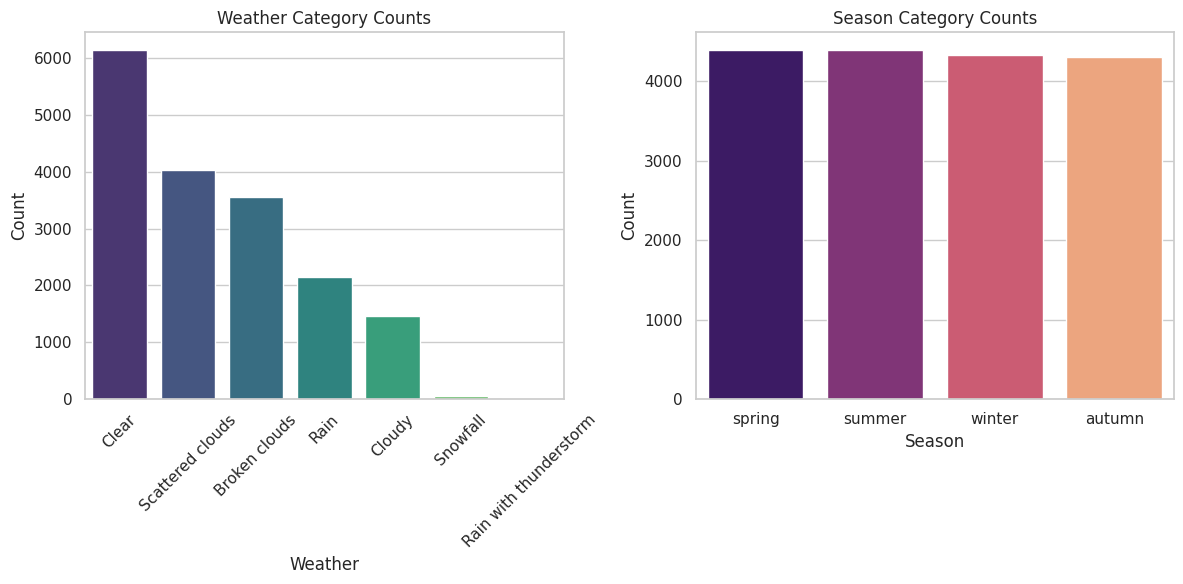

Proportions of Weather Categories:
Clear                     0.353164
Scattered clouds          0.231653
Broken clouds             0.203916
Rain                      0.122947
Cloudy                    0.084070
Snowfall                  0.003446
Rain with thunderstorm    0.000804
Name: weather, dtype: float64

Proportions of Season Categories:
spring    0.252326
summer    0.251924
winter    0.248651
autumn    0.247100
Name: season, dtype: float64


In [21]:
#Visualize Categorical Variables

# using bar plots
plt.figure(figsize=(12, 6))

# Bar plot for weather
plt.subplot(1, 2, 1)
sns.barplot(x=weather_counts.index, y=weather_counts.values, palette='viridis')
plt.title('Weather Category Counts')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Bar plot for season
plt.subplot(1, 2, 2)
sns.barplot(x=season_counts.index, y=season_counts.values, palette='magma')
plt.title('Season Category Counts')
plt.xlabel('Season')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Print proportions
print("Proportions of Weather Categories:")
print(weather_proportions)
print("\nProportions of Season Categories:")
print(season_proportions)

#### 2- Bivariate Analysis

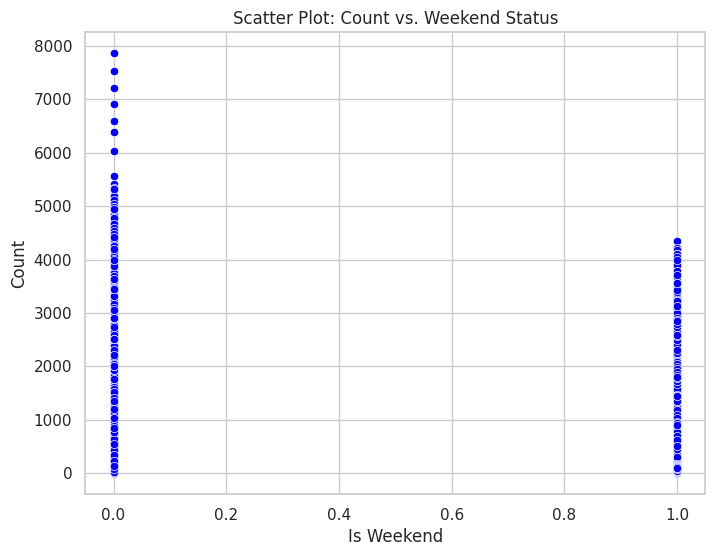

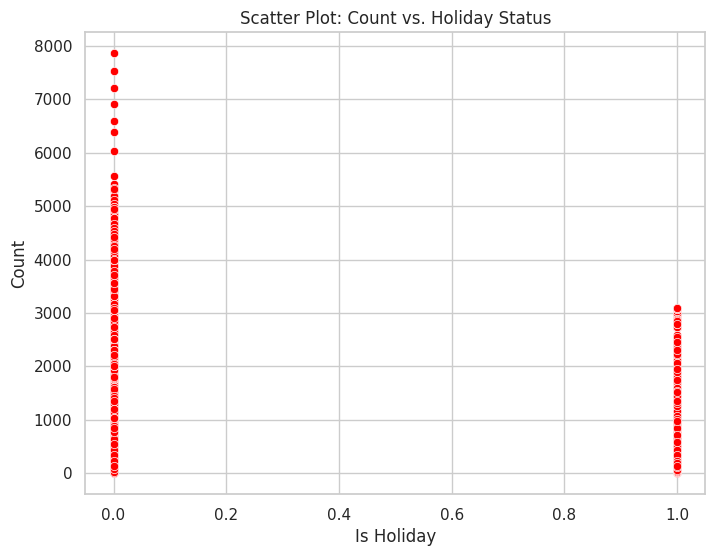

In [22]:
#relationships between numerical variables

# Plot scatter plot between 'count' and 'is_weekend'
plt.figure(figsize=(8, 6))
sb.scatterplot(x='is_weekend', y='count', data=bikes, color='blue')
plt.title('Scatter Plot: Count vs. Weekend Status')
plt.xlabel('Is Weekend')
plt.ylabel('Count')
plt.show()



# Plot scatter plot between 'count' and 'is_holiday'
plt.figure(figsize=(8, 6))
sb.scatterplot(x='is_holiday', y='count', data=bikes, color='red')
plt.title('Scatter Plot: Count vs. Holiday Status')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.show()


<ipython-input-23-56fa4820d95c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='count', data=bikes, palette='viridis')


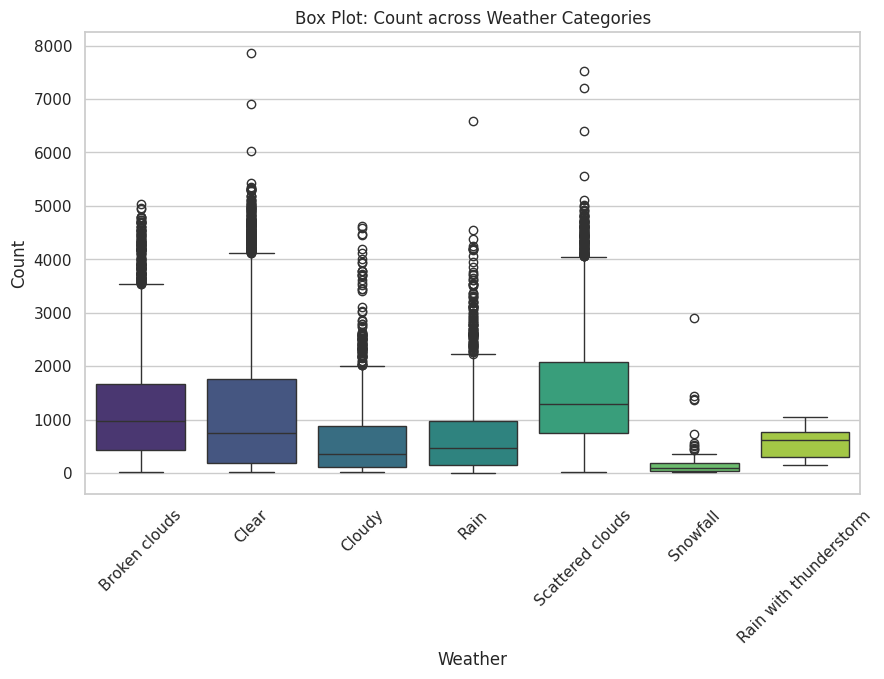

<ipython-input-23-56fa4820d95c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='count', data=bikes, palette='magma')


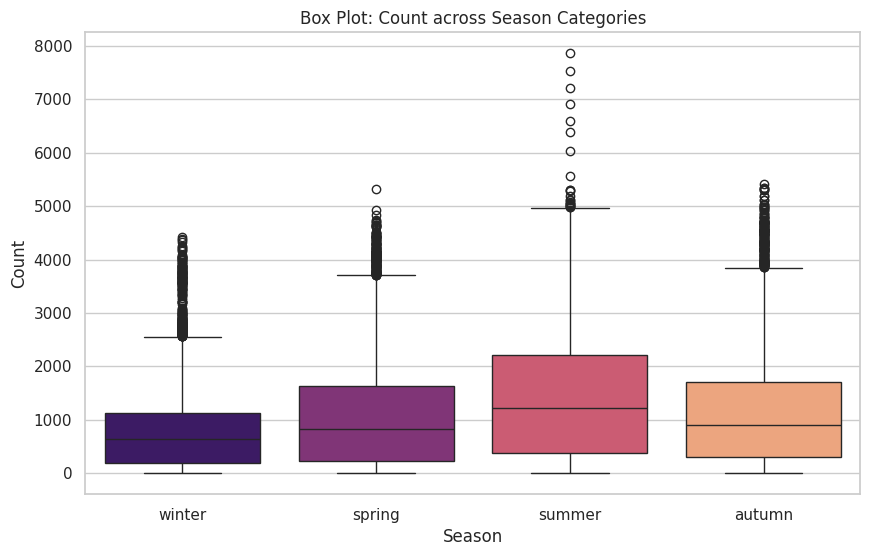

In [23]:
#Categorical vs. Numerical Variables

#Box plot: Count across different weather categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=bikes, palette='viridis')
plt.title('Box Plot: Count across Weather Categories')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()





# Box plot: Count across different season categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='count', data=bikes, palette='magma')
plt.title('Box Plot: Count across Season Categories')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()



#### 3- Temporal analysis

involves analyzing trends over time.

In [24]:
#1- convert timestampt to datatime format
# 2015-01-04 00:00:00 ==> 'YYYY-MM-DD HH:MM:SS'

bikes['time'] = pd.to_datetime(bikes['time'])

In [25]:
bikes['time']

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: time, Length: 17414, dtype: datetime64[ns]

In [26]:
#2- aggregate data based on the level of detail we want to analyze
bikes_monthly = bikes.resample('M', on='time').sum()

#if you want to know the total count of bike rentals over each time interval (e.g., monthly total bike rentals)

<ipython-input-26-6b0551a0aba3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bikes_monthly = bikes.resample('M', on='time').sum()


In [27]:
bikes_monthly

,count,temp_real_C,temp_feels_like_C,humidity_percent,wind_speed_kph,is_holiday,is_weekend
time,,,,,,,
2015-01-31,546639,4101.000000,2255.500000,510.0500,12502.000000,0.0,192.0
2015-02-28,543594,3721.500000,1868.000000,519.5000,9873.500000,0.0,192.0
2015-03-31,695934,6093.500000,4558.500000,518.3225,12938.250000,0.0,215.0
2015-04-30,831582,7873.000000,7112.500000,484.6800,10988.500000,48.0,191.0
2015-05-31,895413,10091.500000,9803.500000,479.3900,14268.500000,48.0,240.0
2015-06-30,1033252,12151.500000,12073.000000,443.7150,12398.000000,0.0,192.0
2015-07-31,1120687,14107.000000,14060.000000,466.3250,13067.000000,0.0,192.0
2015-08-31,1033951,13830.500000,13816.500000,519.1350,10326.000000,24.0,240.0
2015-09-30,892478,10371.000000,10357.500000,520.0200,9394.000000,0.0,185.0


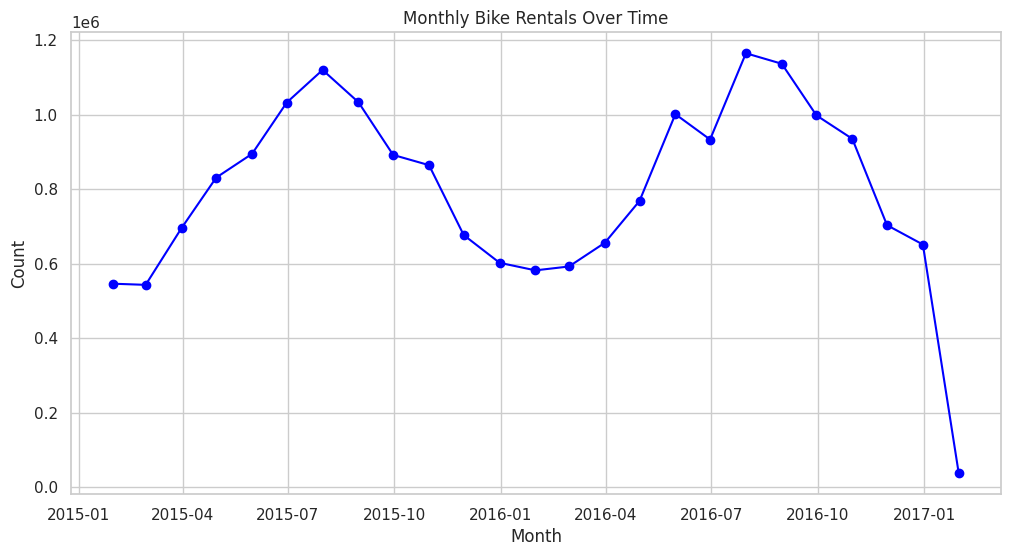

In [28]:
#3- plot

# Plot count against time (monthly)
plt.figure(figsize=(12, 6))
plt.plot(bikes_monthly.index, bikes_monthly['count'], color='blue', marker='o')  # Using 'count' column from bikes_monthly
plt.title('Monthly Bike Rentals Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.show()



### Statistical Analysis

1- Correlation Analysis


Correlation coefficients between numerical variables to understand the strength and direction of their relationships.

In [29]:
numerical_variables = ['count', 'temp_real_C', 'temp_feels_like_C', 'humidity_percent', 'wind_speed_kph']

correlation_matrix = bikes[numerical_variables].corr()

print(correlation_matrix)

                      count  temp_real_C  temp_feels_like_C  humidity_percent  \
count              1.000000     0.388798           0.369035         -0.462901   
temp_real_C        0.388798     1.000000           0.988344         -0.447781   
temp_feels_like_C  0.369035     0.988344           1.000000         -0.403495   
humidity_percent  -0.462901    -0.447781          -0.403495          1.000000   
wind_speed_kph     0.116295     0.145471           0.088409         -0.287789   

                   wind_speed_kph  
count                    0.116295  
temp_real_C              0.145471  
temp_feels_like_C        0.088409  
humidity_percent        -0.287789  
wind_speed_kph           1.000000  


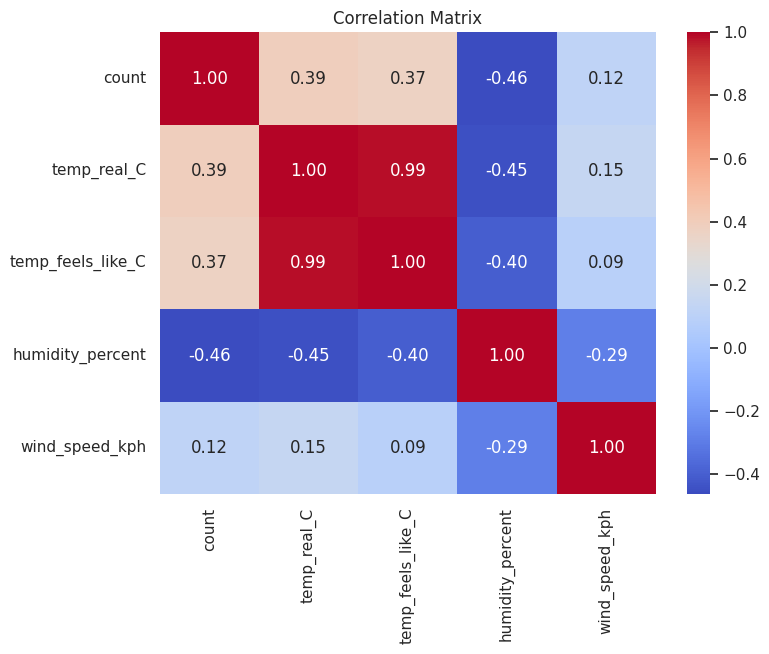

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
